In [1]:
from repath.utils.paths import project_root
from repath.postprocess.results import SlidesIndexResults
import repath.data.datasets.camelyon16 as camelyon16
from repath.postprocess.find_lesions import LesionFinderWang, LesionFinderLee

In [2]:
experiment_name = "lee"
experiment_root = project_root() / "experiments" / experiment_name

In [3]:
resultsin_train = experiment_root / "train_index16" / "pre_hnm_results" 
resultsout_train = experiment_root / "train_index16" / "pre_hnm_results" / "lesion_results"
results_dir_name = "results"
heatmap_dir_name = "heatmaps"

In [4]:
mask_dir = project_root() / 'data' / 'camelyon16' / 'processed/train/masks/evaluation'

In [5]:
title_train = experiment_name + " experiment, pre hnm model, Camelyon 16 train dataset"

In [6]:
train_results_pre = SlidesIndexResults.load_results_index(camelyon16.training(), resultsin_train, results_dir_name, heatmap_dir_name)

In [7]:
import copy
small_train_results_pre = copy.deepcopy(train_results_pre)
small_train_results_pre.patches = small_train_results_pre.patches[95:125]

In [8]:
# lee example can do for either pre or post
lesion_finder = LesionFinderWang(mask_dir, resultsout_train)
#lesion_finder.calc_lesions(small_train_results_pre, small_train_results_pre)

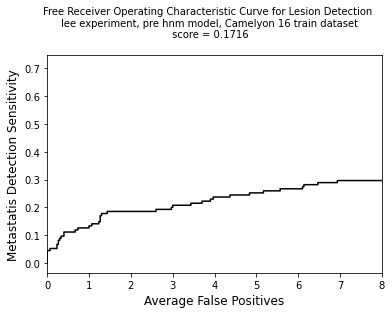

In [9]:
lesion_finder.calc_lesion_results(title_train, ci=False)

tot fps:  (800, 1)  froc_curve_ci:  (800, 2)
(2, 800)


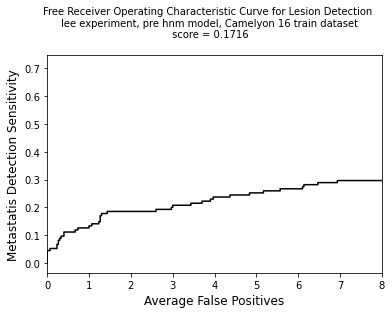

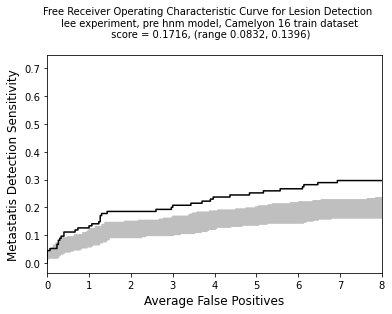

In [13]:
lesion_finder.calc_lesion_results(title_train, ci=True, nreps=100)

0.998828947544098


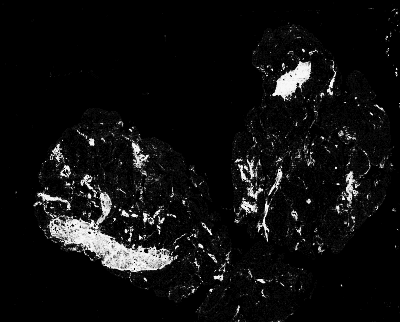

In [11]:
from PIL import Image
import numpy as np

tiny_train_results_pre = copy.deepcopy(train_results_pre)
tiny_train_results_pre.patches = tiny_train_results_pre.patches[90:91]

heatmap = tiny_train_results_pre.patches[0].to_heatmap('tumor')
print(np.max(heatmap))

Image.fromarray(np.array(np.multiply(heatmap, 255), dtype=np.uint8))

In [12]:
#valid_results_post = SlidesIndexResults.load(camelyon16.training(), resultsin_post)

# wang example need both pre and post
#lesion_finder = LesionFinderWang(mask_dir)
#lesion_finder.calc_lesion_metrics(valid_results_pre, valid_results_post, results_out_post, title_post)

# lee example can do for either pre or post
#lesion_finder = LesionFinderLee(mask_dir)
#lesion_finder.calc_lesion_metrics(valid_results_pre, results_out_pre, title_pre)
#lesion_finder.calc_lesion_metrics(valid_results_post, results_out_post, title_post)